In [25]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style("whitegrid")

In [3]:
pen = sns.load_dataset("penguins")
pen.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [14]:
pen_pivot = pen.pivot_table(index="species", columns="sex", values="body_mass_g", aggfunc="mean")
pen_pivot

sex,Female,Male
species,,
Adelie,3368.835616,4043.493151
Chinstrap,3527.205882,3938.970588
Gentoo,4679.741379,5484.836066


<Axes: xlabel='sex', ylabel='species'>

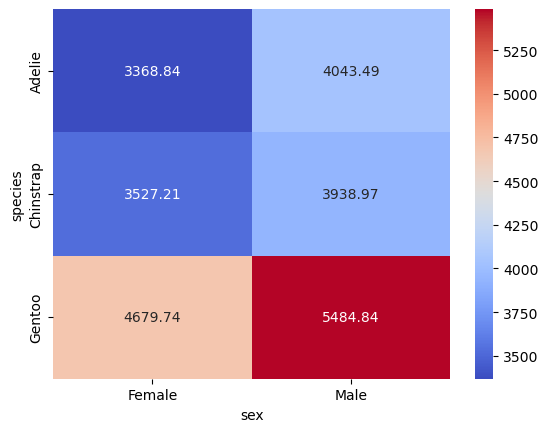

In [17]:
sns.heatmap(pen_pivot, annot=True, cmap="coolwarm", fmt=".2f")

***

<Figure size 1200x600 with 0 Axes>

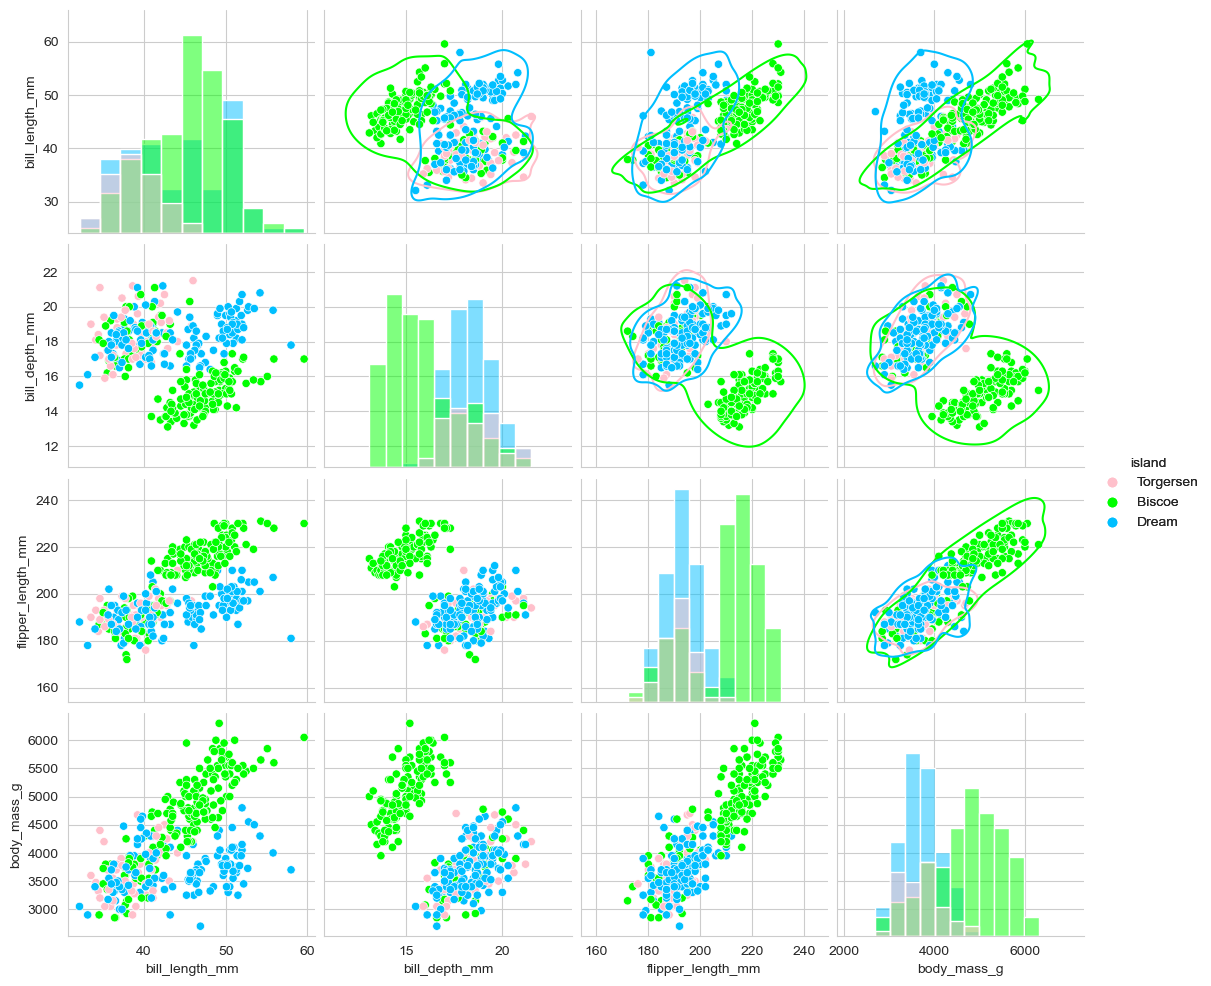

In [31]:
#Marker einsetzen

#Marker einsetzen
plt.figure(figsize=(12,6))
palet = sns.color_palette(["#FFC0CB", "#00FF00", "#00BFFF"])
plot = sns.pairplot(pen, hue="island", diag_kind="hist", palette=palet, plot_kws={"alpha": 1})
plot.map_upper(sns.kdeplot, levels=1)
plot.add_legend();

***

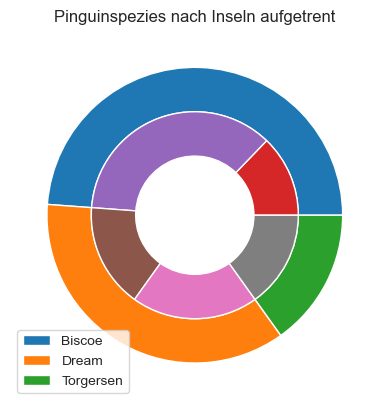

In [36]:
#Daten vorbereiten
counter = pen.groupby(['island', 'species'])
inseln = counter.size().reset_index(name='counts')




#Plot erstellen
fig, ax = plt.subplots()

size = 0.3

ax.pie(inseln.groupby("island").sum()["counts"], radius=1,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inseln["counts"], radius=1-size,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pinguinspezies nach Inseln aufgetrent')
colors = {'Biscoe': 'tab:blue',
          'Dream': 'tab:orange',
          'Torgersen': 'tab:green'}
ax.legend(colors.keys(), loc="lower left")

plt.show()